## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Suppressing the warnings from statsmodels
import warnings
warnings.filterwarnings('ignore')

# Airline passengers dataset - Non-Stationary
df1 = pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq='MS'

# Female Birth dataset - Stationary
df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq='D'

In [2]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [4]:
from statsmodels.tsa.stattools import adfuller,grangercausalitytests
#from statsmodels.tools.eval_measures import mse,rmse,meanabs - as an alternative to sklearn

### Stationarity Tests

##### Mean and variance between any 2 equidistant points is constant

##### Augmented Dickey Fuller Test and KPSS test determine whether the series is stationary or not

#### Null hypothesis $H_0$ is that the series is non-stationary and contains a unit root. Altnerate hypothesis $H_1$ is that series is stationary

## Augmented Dickey Fuller Test

p-value > 0.05 then series is not stationary

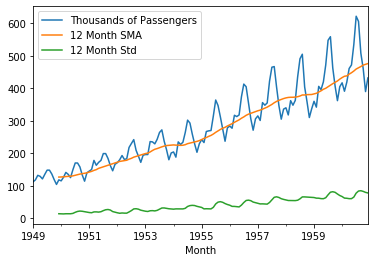

In [7]:
df1['12 Month SMA'] = df1['Thousands of Passengers'].rolling(window=12).mean()
df1['12 Month Std'] = df1['Thousands of Passengers'].rolling(window=12).std()

df1.plot();

In [8]:
print('Augmented Dickey Fuller Test for Airline Data')
dftest = adfuller(df1['Thousands of Passengers'])

dftest

Augmented Dickey Fuller Test for Airline Data


(0.8153688792060544,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [9]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
    
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None, then maxlag lags are used
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information 

In [10]:
print('Augmented Dickey Fuller Test for Airline Data')

dfout=pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# of lags','# of observations'])

print(dfout)

Augmented Dickey Fuller Test for Airline Data
ADF test statistic      0.815369
p-value                 0.991880
# of lags              13.000000
# of observations     130.000000
dtype: float64


Since p-value is 0.991880 which is > 0.05 we fail to reject null hypothesis.

Series is non-stationary

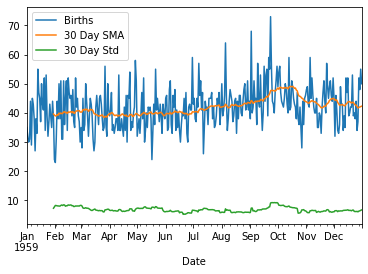

In [11]:
df2['30 Day SMA'] = df2['Births'].rolling(window=30).mean()
df2['30 Day Std'] = df2['Births'].rolling(window=30).std()

df2.plot();

In [12]:
print('Augmented Dickey Fuller Test for Airline Data')

dftest = adfuller(df2['Births'])


dfout=pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# of lags','# of observations'])

print(dfout)

Augmented Dickey Fuller Test for Airline Data
ADF test statistic     -4.808291
p-value                 0.000052
# of lags               6.000000
# of observations     358.000000
dtype: float64


Here p-value is 0.000052 which is < 0.05 so we reject null hypothesis

Series is Stationary

In [15]:
df3 = pd.read_csv('Data/samples.csv',index_col=0,parse_dates=True)
df3.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


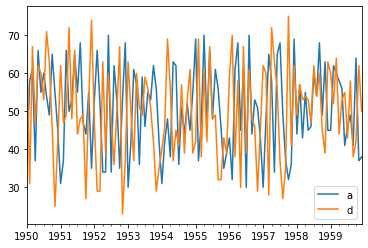

In [25]:
df3[['a','d']].plot();

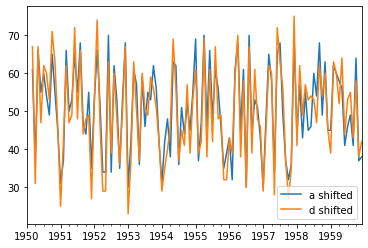

In [27]:
df3['a'].iloc[2:].plot(legend=True,label='a shifted')
df3['d'].shift(2).plot(legend=True,label='d shifted');

In [28]:
grangercausalitytests(df3[['a','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


## While looking for lowest p-values, we find that these are occuring at 2nd lag, so we can safely ignore others.

In [31]:
grangercausalitytests(df3[['b','d']],maxlag=9);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7084  , p=0.5879  

# Great Job !!